In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
# read in csv
df = pd.read_csv("ds_sal.csv")

# filters out the jobs with less than 100 entries in dataset
job_title_counts = df["job_title"].value_counts()
filtered_job_titles = job_title_counts[job_title_counts >= 100].index
filtered_df = df[df["job_title"].isin(filtered_job_titles)]
filtered_df["job_title"].value_counts()

# num of entries for each job title
def visualize_job_entries(chart_type):
    filtered_df_job_count = filtered_df["job_title"].value_counts()
    if chart_type == "Bar Chart":
        # creates bar plot
        plt.figure(figsize=(20, 15))
        sns.barplot(x=filtered_df_job_count.index, y=filtered_df_job_count.values, palette="flare")
        plt.title("Number of Entries for Each Job Title")
        plt.xlabel("Job Title")
        plt.ylabel("Number of Entries")
        plt.xticks(rotation=45)
        plt.savefig("job_entries_bar_plot.png")
        plt.close()
        return "job_entries_bar_plot.png"  
    elif chart_type == "Pie Chart":
        # creates pie chart
        plt.figure(figsize=(20, 20))
        plt.pie(filtered_df_job_count, labels=filtered_df_job_count.index, autopct='%1.2f%%')
        plt.title("Distribution of Job Titles")
        plt.axis("equal")
        plt.savefig("job_entries_pie_chart.png")
        plt.close()
        return "job_entries_pie_chart.png"

# experience level salaries for each job title
def visualize_exp_level(exp_level):
    # filtered df for each experience level
    en_df = filtered_df[filtered_df["experience_level"] == "EN"]
    mi_df = filtered_df[filtered_df["experience_level"] == "MI"]
    se_df = filtered_df[filtered_df["experience_level"] == "SE"]
    ex_df = filtered_df[filtered_df["experience_level"] == "EX"]
    if exp_level == "Entry Level":
        # create boxplot for entry level
        plt.figure(figsize=(20, 20))
        sns.boxplot(x = "salary_in_usd", y = "job_title", data = en_df, palette = "Spectral")
        plt.title("Distribution of Salary for Entry Level")
        plt.xlabel("Salary in USD")
        plt.ylabel("Job Title")
        plt.savefig("en_level_box_plot.png")
        plt.close()
        return "en_level_box_plot.png"
    elif exp_level == "Medium Level":
        # create boxplot for medium level
        plt.figure(figsize=(20, 20))
        sns.boxplot(x = "salary_in_usd", y = "job_title", data = mi_df, palette = "Spectral")
        plt.title("Distribution of Salary for Medium Level")
        plt.xlabel("Salary in USD")
        plt.ylabel("Job Title")
        plt.savefig("mi_level_box_plot.png")
        plt.close()
        return "mi_level_box_plot.png"
    elif exp_level == "Senior Level":
        # create boxplot for senior level
        plt.figure(figsize=(20, 20))
        sns.boxplot(x = "salary_in_usd", y = "job_title", data = se_df, palette = "Spectral")
        plt.title("Distribution of Salary for Senior Level")
        plt.xlabel("Salary in USD")
        plt.ylabel("Job Title")
        plt.savefig("se_level_box_plot.png")
        plt.close()
        return "se_level_box_plot.png"
    elif exp_level == "Executive Level":
        plt.figure(figsize=(20, 20))
        sns.boxplot(x = "salary_in_usd", y = "job_title", data = ex_df, palette = "Spectral")
        plt.title("Distribution of Salary for Executive Level")
        plt.xlabel("Salary in USD")
        plt.savefig("ex_level_box_plot.png")
        plt.close()
        return "ex_level_box_plot.png"

# mean salary exploration
def visualize_mean_salary(var):
    if var == "Experience Level":
        # create barplot for mean salary for experience level
        mean_salary_by_exp_lv = filtered_df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)
        plt.figure(figsize=(12, 8))
        sns.barplot(x = mean_salary_by_exp_lv.index, y = mean_salary_by_exp_lv.values, palette = "Spectral")
        plt.title("Mean Salary in USD for Each Experience Level")
        plt.xlabel("Experience Level")
        plt.ylabel("Mean Salary in USD")
        plt.savefig("exp_lv_mean_salary.png")
        plt.close()
        return "exp_lv_mean_salary.png"
    elif var == "Job Title":
        mean_salary_by_job = filtered_df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)
        plt.figure(figsize=(18, 15))
        sns.barplot(x = mean_salary_by_job.values, y = mean_salary_by_job.index, palette = "Spectral")
        plt.title("Mean Salary in USD for Each Job Title")
        plt.xlabel("Mean Salary in USD")
        plt.ylabel("Job Title")
        plt.savefig("job_title_mean_salary.png")
        plt.close()
        return "job_title_mean_salary.png"
    elif var == "Year":
        mean_salary_by_year = filtered_df.groupby("work_year")["salary_in_usd"].mean()
        plt.figure(figsize=(12, 8))
        sns.barplot(x = mean_salary_by_year.index, y = mean_salary_by_year.values, palette = "Spectral")
        plt.title("Mean Salary in USD By Year")
        plt.xlabel("Year")
        plt.ylabel("Mean Salary in USD")
        plt.savefig("year_mean_salary.png")
        plt.close()
        return "year_mean_salary.png"
    elif var == "Remote Ratio":
        mean_salary_by_remoteness = filtered_df.groupby("remote_ratio")["salary_in_usd"].mean()
        plt.figure(figsize=(12, 8))
        sns.barplot(x = mean_salary_by_remoteness.index, y = mean_salary_by_remoteness.values, palette = "Spectral")
        plt.title("Mean Salary in USD By Remote Ratio")
        plt.xlabel("Year")
        plt.ylabel("Mean Salary in USD")
        plt.savefig("remote_mean_salary.png")
        plt.close()
        return "remote_mean_salary.png"
    elif var == "Company Size":
        mean_salary_by_company_size = filtered_df.groupby("company_size")["salary_in_usd"].mean()
        plt.figure(figsize=(12, 8))
        sns.barplot(x = mean_salary_by_company_size.index, y = mean_salary_by_company_size.values, palette = "Spectral")
        plt.title("Mean Salary in USD By Company Size")
        plt.xlabel("Year")
        plt.ylabel("Mean Salary in USD")
        plt.savefig("comp_size_mean_salary.png")
        plt.close()
        return "comp_size_mean_salary.png"

# model code
final_df = filtered_df.drop(["employee_residence","company_location","salary","salary_currency"], axis=1)
forest_df = final_df.copy()

# use one hot encoding on categorical variables
one_hot_encoded_data = pd.get_dummies(forest_df, columns = ["experience_level", "employment_type", "job_title", "company_size"], dtype = int)

# z-score scale the numerical variables
scaler = StandardScaler()
one_hot_encoded_data["remote_ratio"] = scaler.fit_transform(one_hot_encoded_data[["remote_ratio"]])
one_hot_encoded_data["work_year"] = scaler.fit_transform(one_hot_encoded_data[["work_year"]])

# training and fitting model
feat_matrix = one_hot_encoded_data.drop(["salary_in_usd"], axis = 1)
target_array = one_hot_encoded_data["salary_in_usd"]

forest_cross_val_model = RandomForestRegressor(n_estimators=100, random_state=50)

# user input code for model
def predict_salary_and_plot(work_year, remote_ratio, experience_level, employment_type, job_title, company_size):
    # updates model with user inputs
    new_data = {
        "work_year": [work_year],
        "remote_ratio": [remote_ratio],
        "experience_level_EN": [1 if experience_level == "EN" else 0],
        "experience_level_MI": [1 if experience_level == "MI" else 0],
        "experience_level_SE": [1 if experience_level == "SE" else 0],
        "experience_level_EX": [1 if experience_level == "EX" else 0],
        "employment_type_CT": [1 if employment_type == "CT" else 0],
        "employment_type_FL": [1 if employment_type == "FL" else 0],
        "employment_type_FT": [1 if employment_type == "FT" else 0],
        "employment_type_PT": [1 if employment_type == "PT" else 0],
        "job_title_" + job_title: [1],
        "company_size_" + company_size: [1]
    }
    new_data_df = pd.DataFrame(new_data)

    # scale numerical variables
    new_data_df["remote_ratio"] = scaler.fit_transform(new_data_df[["remote_ratio"]])
    new_data_df["work_year"] = scaler.fit_transform(new_data_df[["work_year"]])

    # fit and predict model
    forest_cross_val_model.fit(feat_matrix, target_array)
    new_data_aligned = new_data_df.reindex(columns=feat_matrix.columns, fill_value=0)
    predicted_salary = forest_cross_val_model.predict(new_data_aligned)

    # filter the testing data to include same inputs as user
    testing_df = final_df[(final_df["experience_level"] == experience_level) & 
                          (final_df["job_title"] == job_title) & 
                          (final_df["remote_ratio"] == remote_ratio) & 
                          (final_df["company_size"] == company_size)]
    
    # calc the mean salary for each year
    mean_salary_per_year = testing_df.groupby("work_year")["salary_in_usd"].mean()

    # plot the mean salary
    plt.plot(mean_salary_per_year.index, mean_salary_per_year.values, label = "Mean Salary")

    # plot the predicted salary
    plt.scatter(work_year, predicted_salary, color = "red", label = "Predicted Salary")
    plt.xlabel("Year")
    plt.ylabel("Salary in USD")
    plt.title("Mean Salary per Year for Selected Job")
    plt.legend()
    plt.savefig("predict_salary.png")
    plt.close()
    return predicted_salary[0], "predict_salary.png"

# user interface inputs
inputs = [
    gr.Number(label = "Work Year"),
    gr.Radio(label = "Remote Ratio", choices = [0, 50, 100], info = "Time Spent Remote (0 = Never, 50 = Half of the Time, 100 = Always)"),
    gr.Radio(label = "Experience Level", choices =["EN", "MI", "SE", "EX"], info = "EN = Entry Level, MI = Medium Level, SE = Senior Level, EX = Executive Level"),
    gr.Radio(label = "Employment Type", choices = ["FT", "PT", "CT", "FL"], info = "FT = Full Time, PT = Part Time, CT = Contract, FT = Freelance"),
    gr.Dropdown(label="Job Title", choices=["AI Engineer", "Analytics Engineer", "Applied Scientist", "Business Intelligence Analyst", "Business Intelligence Engineer", "Data Analyst", "Data Architect", "Data Engineer", "Data Manager", "Data Science", "Data Science Manager", "Data Scientist", "ML Engineer", "Machine Learning Engineer", "Machine Learning Scientist", "Research Analyst", "Research Engineer", "Research Scientist"]),
    gr.Radio(label="Company Size", choices=["S", "M", "L"], info = "S = Small, M = Medium, L = Large")
]

# interface outputs
outputs = [
    gr.Textbox(label = "Predicted Salary"),
    gr.Image(label = "Predicted Salary for Job in Comparison With Average Salary")
]

# about tab code

# gradio
visualize_job_entries_interface = gr.Interface(fn = visualize_job_entries,
                                               title = "Job Entries Visualization",
                                               inputs = [gr.Dropdown(["Bar Chart", "Pie Chart"], label = "Chart Type")],
                                               outputs = gr.Image())

visualize_exp_level_interface = gr.Interface(fn = visualize_exp_level,
                                             title = "Distribution of Salary for Each Experience Level",
                                             inputs = [gr.Dropdown(["Entry Level", "Medium Level", "Senior Level", "Executive Level"], label = "Experience Level")],
                                             outputs = gr.Image())

visualize_mean_salary_interface = gr.Interface(fn = visualize_mean_salary,
                                               title = "Mean Salary Exploration",
                                               inputs = [gr.Dropdown(["Experience Level", "Job Title", "Year", "Remote Ratio", "Company Size"], label = "Comparison Variable")],
                                               outputs = gr.Image())

model = gr.Interface(fn = predict_salary_and_plot, 
                     title = "Predict Salary and Plot", 
                     inputs = inputs, 
                     outputs = outputs)

about_tab = gr.Interface(fn = None,
                         inputs = None,
                         outputs = [gr.Markdown("Welcome to my Gradio App designed for exploring data science salaries. The aim of the app is to help users understand salary distributions in the data field. By entering relevant information about themselves, users can receive an estimate of the salary they can expect to earn. Additionally, the app showcases a comparative plot illustrating how their predicted salary aligns with the average salary for the corresponding year. My goal is to provide users with valuable insights to make informed decisions about their career trajectory.", label = "About the App and Dataset"),
                                    gr.Markdown("The dataset used for this app created by Saurabh Dabole and can be found on Kaggle: https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024. The dataset is sourced from this site: ai-jobs.net, and the data was gathered through users inputting their information into a form")])

gr.TabbedInterface([model, visualize_job_entries_interface, visualize_exp_level_interface, visualize_mean_salary_interface, about_tab],
                    tab_names = ["Salary Prediction Model", "Job Distribution Visualizations", "Experience Level Salary Distribution Visualizations", "Mean Salary Visualizations", "About"],
                    theme = "monochrome").launch(share = True)

Running on local URL:  http://127.0.0.1:7881
Running on public URL: https://bc64d525ced5d07880.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [3]:
# df with variables I am interested in
final_df = filtered_df.drop(["employee_residence","company_location","salary","salary_currency"], axis=1)
forest_df = final_df.copy()

# use one hot encoding on categorical variables
one_hot_encoded_data = pd.get_dummies(forest_df, columns = ["experience_level", "employment_type", "job_title", "company_size"], dtype = int)

# z-score scale the numerical variables
scaler = StandardScaler()
one_hot_encoded_data["remote_ratio"] = scaler.fit_transform(one_hot_encoded_data[["remote_ratio"]])
one_hot_encoded_data["work_year"] = scaler.fit_transform(one_hot_encoded_data[["work_year"]])

# training and fitting model
feat_matrix = one_hot_encoded_data.drop(["salary_in_usd"], axis = 1)
target_array = one_hot_encoded_data["salary_in_usd"]

forest_cross_val_model = RandomForestRegressor(n_estimators=100, random_state=50)
cross_val = KFold(n_splits=5, random_state=50, shuffle=True)

scores = -1 * cross_val_score(forest_cross_val_model, feat_matrix, target_array, cv=cross_val, scoring="neg_mean_absolute_error")
print("MAE scores:\n", scores)

MAE scores:
 [41645.78602259 42687.82014799 44338.40212676 44031.84711319
 42649.4916875 ]


In [4]:
one_hot_encoded_data.columns.tolist()

['work_year',
 'salary_in_usd',
 'remote_ratio',
 'experience_level_EN',
 'experience_level_EX',
 'experience_level_MI',
 'experience_level_SE',
 'employment_type_CT',
 'employment_type_FL',
 'employment_type_FT',
 'employment_type_PT',
 'job_title_AI Engineer',
 'job_title_Analytics Engineer',
 'job_title_Applied Scientist',
 'job_title_Business Intelligence Analyst',
 'job_title_Business Intelligence Engineer',
 'job_title_Data Analyst',
 'job_title_Data Architect',
 'job_title_Data Engineer',
 'job_title_Data Manager',
 'job_title_Data Science',
 'job_title_Data Science Manager',
 'job_title_Data Scientist',
 'job_title_ML Engineer',
 'job_title_Machine Learning Engineer',
 'job_title_Machine Learning Scientist',
 'job_title_Research Analyst',
 'job_title_Research Engineer',
 'job_title_Research Scientist',
 'company_size_L',
 'company_size_M',
 'company_size_S']

In [5]:
# Example input data for prediction
new_data = {
    "work_year" : [2022],
    "remote_ratio" : [0],
    "experience_level_EN" : [0],
    "experience_level_MI" : [1],
    "experience_level_SE" : [0],
    "experience_level_EX" : [0],
    'employment_type_CT' : [0],
    'employment_type_FL' : [0],
    'employment_type_FT' : [1],
    'employment_type_PT' : [0],
    'job_title_AI Engineer' : [0],
    'job_title_Analytics Engineer' : [0],
    'job_title_Applied Scientist' : [0],
    'job_title_Business Intelligence Analyst' : [0],
    'job_title_Business Intelligence Engineer' : [0],
    'job_title_Data Analyst' : [0],
    'job_title_Data Architect' : [0],
    'job_title_Data Engineer' : [1],
    'job_title_Data Manager' : [0],
    'job_title_Data Science' : [0],
    'job_title_Data Science Manager' : [0],
    'job_title_Data Scientist' : [0],
    'job_title_ML Engineer' : [0],
    'job_title_Machine Learning Engineer' : [0],
    'job_title_Machine Learning Scientist' : [0],
    'job_title_Research Analyst' : [0],
    'job_title_Research Engineer' : [0],
    'job_title_Research Scientist' : [0],
    'company_size_L' : [1],
    'company_size_M' : [0],
    'company_size_S' : [0]
}

# Convert new_data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Apply scaling to numerical variables
new_data_df["remote_ratio"] = scaler.fit_transform(new_data_df[["remote_ratio"]])
new_data_df["work_year"] = scaler.fit_transform(new_data_df[["work_year"]])

# Make prediction
forest_cross_val_model.fit(feat_matrix, target_array)
new_data_aligned = new_data_df.reindex(columns=feat_matrix.columns, fill_value=0)
predicted_salary = forest_cross_val_model.predict(new_data_aligned)

print("Predicted salary:", predicted_salary)

Predicted salary: [80451.12466667]


In [6]:
testing_df = final_df[(final_df["experience_level"] == "MI") & (final_df["job_title"] == "Data Engineer") & (final_df["remote_ratio"] == 0) & (final_df["company_size"] == "L")]
testing_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
2653,2024,MI,FT,Data Engineer,205600,0,L
2654,2024,MI,FT,Data Engineer,205600,0,L
2655,2023,MI,FT,Data Engineer,205600,0,L
3873,2024,MI,FT,Data Engineer,185000,0,L
7865,2023,MI,FT,Data Engineer,139152,0,L
9902,2024,MI,FT,Data Engineer,130000,0,L
10856,2024,MI,FT,Data Engineer,105700,0,L
10857,2024,MI,FT,Data Engineer,105700,0,L
10858,2023,MI,FT,Data Engineer,105700,0,L
12572,2023,MI,FT,Data Engineer,82452,0,L


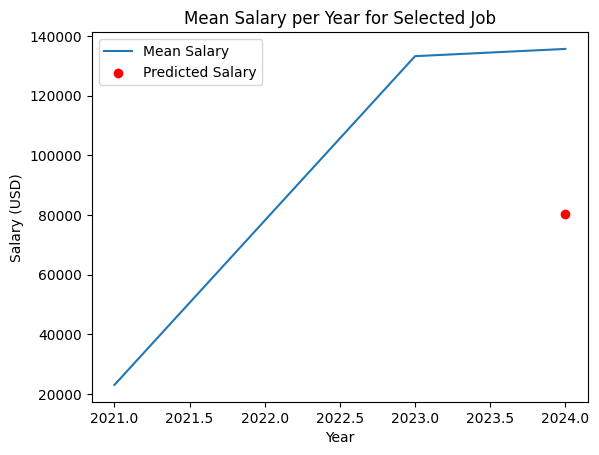

In [7]:
filtered_data = one_hot_encoded_data.copy()

temp_df = final_df.copy()
for column, value in new_data.items():
    filtered_data = filtered_data[filtered_data[column] == value[0]]

# Calculate the mean salary for each year
mean_salary_per_year = testing_df.groupby('work_year')['salary_in_usd'].mean()

# Plot the mean salary for each year
plt.plot(mean_salary_per_year.index, mean_salary_per_year.values, label='Mean Salary')

# Add a marker for the predicted salary
plt.scatter(2024, predicted_salary, color='red', label='Predicted Salary')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.title('Mean Salary per Year for Selected Job')
plt.legend()

# Show plot
plt.show()

In [26]:
# Your data processing and model training code here...
def predict_salary_and_plot(work_year, remote_ratio, experience_level, employment_type, job_title, company_size):
    # Update new_data dictionary with user inputs
    new_data = {
        "work_year": [work_year],
        "remote_ratio": [remote_ratio],
        "experience_level_EN": [1 if experience_level == "EN" else 0],
        "experience_level_MI": [1 if experience_level == "MI" else 0],
        "experience_level_SE": [1 if experience_level == "SE" else 0],
        "experience_level_EX": [1 if experience_level == "EX" else 0],
        "employment_type_CT": [1 if employment_type == "CT" else 0],
        "employment_type_FL": [1 if employment_type == "FL" else 0],
        "employment_type_FT": [1 if employment_type == "FT" else 0],
        "employment_type_PT": [1 if employment_type == "PT" else 0],
        "job_title_" + job_title: [1],
        "company_size_" + company_size: [1]
    }

    # Convert new_data to DataFrame
    new_data_df = pd.DataFrame(new_data)

    # Apply scaling to numerical variables
    new_data_df["remote_ratio"] = scaler.fit_transform(new_data_df[["remote_ratio"]])
    new_data_df["work_year"] = scaler.fit_transform(new_data_df[["work_year"]])

    # Make prediction
    forest_cross_val_model.fit(feat_matrix, target_array)
    new_data_aligned = new_data_df.reindex(columns=feat_matrix.columns, fill_value=0)
    predicted_salary = forest_cross_val_model.predict(new_data_aligned)

    # Filter testing data based on user input
    testing_df = final_df[(final_df["experience_level"] == experience_level) & 
                          (final_df["job_title"] == job_title) & 
                          (final_df["remote_ratio"] == remote_ratio) & 
                          (final_df["company_size"] == company_size)]
    
    # Calculate the mean salary for each year
    mean_salary_per_year = testing_df.groupby('work_year')['salary_in_usd'].mean()

    # Plot the mean salary for each year
    plt.plot(mean_salary_per_year.index, mean_salary_per_year.values, label='Mean Salary')

    # Add a marker for the predicted salary
    plt.scatter(work_year, predicted_salary, color='red', label='Predicted Salary')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Salary (USD)')
    plt.title('Mean Salary per Year for Selected Job')
    plt.legend()

    plt.savefig("predict_salary.png")

    # Close the plot to prevent memory leaks
    plt.close()

    # Return the predicted salary and the plot
    return predicted_salary[0], "predict_salary.png"

# Define input components for Gradio interface
inputs = [
    gr.Number(label="Work Year"),
    gr.Number(label="Remote Ratio"),
    gr.Dropdown(label="Experience Level", choices=["EN", "MI", "SE", "EX"]),
    gr.Dropdown(label="Employment Type", choices=["CT", "FL", "FT", "PT"]),
    gr.Dropdown(label="Job Title", choices=["AI Engineer", "Analytics Engineer", "Applied Scientist", "Business Intelligence Analyst", "Business Intelligence Engineer", "Data Analyst", "Data Architect", "Data Engineer", "Data Manager", "Data Science", "Data Science Manager", "Data Scientist", "ML Engineer", "Machine Learning Engineer", "Machine Learning Scientist", "Research Analyst", "Research Engineer", "Research Scientist"]),
    gr.Dropdown(label="Company Size", choices=["S", "M", "L"])
]

outputs = [
    gr.Textbox(label = "Predicted Salary"),
    gr.Image(label = "Predicted Salary for Job in Comparison With Average Salary")
]

# Define the Gradio interface
gr.Interface(fn=predict_salary_and_plot, 
            inputs=inputs, 
            outputs=outputs, 
            title="Predict Salary and Plot", 
            description="Predict the salary based on input parameters and plot the mean salary per year").launch()


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
